In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [62]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Data Exploration

In [3]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
train_df.describe(include=['O'])

Name   Sex    Ticket    Cabin Embarked
count               891   891       891      204      889
unique              891     2       681      147        3
top     Adams, Mr. John  male  CA. 2343  B96 B98        S
freq                  1   577         7        4      644

In [71]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
cabin_type    0
status        0
dtype: int64

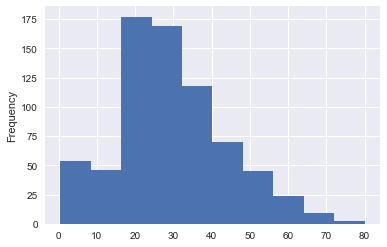

In [7]:
train_df['Age'].plot(kind='hist')

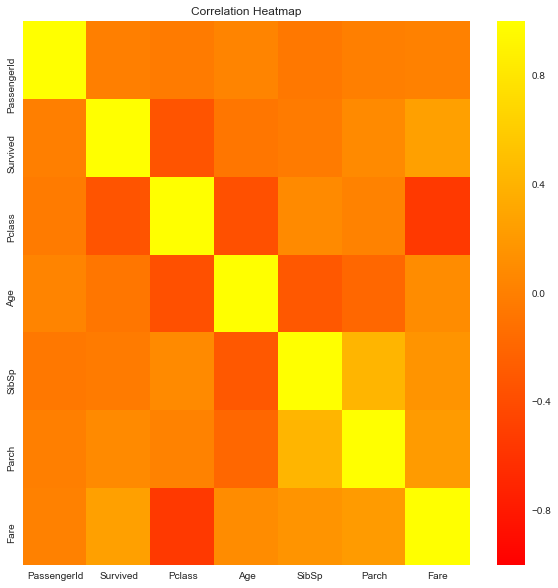

In [8]:
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = train_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='autumn')

# Feature Engineering

In [68]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_type', 'status'],
      dtype='object')

In [63]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [64]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1,'Q':2}).fillna(0)

In [65]:
train_df['cabin_type'] = train_df['Cabin'].str[0].map({'C':0,'B':1,'D':2,'E':3,'A':4,'F':5,'G':6,'T':6}).fillna(-1)

In [66]:
train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})

In [67]:
train_df['status'] = train_df['Name'].str.split(',',1).str[1].str.split(' ').str[1].map({'Mr.':0,'Miss.':1,'Mrs.':2,'Master.':3}).fillna(4)

In [70]:
train_df = train_df.drop(labels=['PassengerId','Name','Ticket','Cabin'],axis=1)

# Model Training

In [72]:
y_train = train_df['Survived']
x_train = train_df.loc[:,train_df.columns != 'Survived']

In [73]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2)

In [102]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
model.score(x_val, y_val)

0.7821229050279329

In [90]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
model.score(x_val, y_val)

0.7150837988826816

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
model.score(x_val, y_val)

0.7541899441340782

In [141]:
from xgboost import XGBClassifier
param = {'max_depth':3, 'eta':1, 'silent':1, 'objective':'binary:logistic'}
num_round = 2
model = XGBClassifier(max_depth=3, silent=1, objective='binary:logistic')
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
model.score(x_val, y_val)

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8156424581005587

# Prediction

In [142]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [143]:
test_df['Embarked'] = test_df['Embarked'].map({'S':0,'C':1,'Q':2}).fillna(0)

In [144]:
test_df['cabin_type'] = test_df['Cabin'].str[0].map({'C':0,'B':1,'D':2,'E':3,'A':4,'F':5,'G':6,'T':6}).fillna(-1)

In [145]:
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

In [146]:
test_df['status'] = test_df['Name'].str.split(',',1).str[1].str.split(' ').str[1].map({'Mr.':0,'Miss.':1,'Mrs.':2,'Master.':3}).fillna(4)

In [147]:
test_df = test_df.drop(labels=['PassengerId','Name','Ticket','Cabin'],axis=1)

In [148]:
y_pred = model.predict(test_df)

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [153]:
ids = pd.read_csv('data/test.csv')
ids = ids['PassengerId']

In [155]:
result = pd.DataFrame({'ids':ids,'prediction':y_pred})

In [156]:
result

ids  prediction
0     892           0
1     893           0
2     894           0
3     895           0
4     896           1
5     897           0
6     898           1
7     899           0
8     900           1
9     901           0
10    902           0
11    903           0
12    904           1
13    905           0
14    906           1
15    907           1
16    908           0
17    909           0
18    910           1
19    911           0
20    912           0
21    913           0
22    914           1
23    915           0
24    916           1
25    917           0
26    918           1
27    919           0
28    920           0
29    921           0
..    ...         ...
388  1280           0
389  1281           0
390  1282           0
391  1283           1
392  1284           1
393  1285           0
394  1286           0
395  1287           1
396  1288           0
397  1289           1
398  1290           0
399  1291           0
400  1292           1
401  1293           0
402  1294           1
403  1295           0
404  1296           1
405  1297           0
406  1298           0
407  1299           0
408  1300           1
409  1301           1
410  1302           1
411  1303           1
412  1304           1
413  1305           0
414  1306           1
415  1307           0
416  1308           0
417  1309           0

[418 rows x 2 columns]